In [ ]:
# CNN : 프로젝트
# K.set_image_data_format('channels_first') # chaccels_last

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols=28,28
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
print('X_train shape : {}'.format(X_train.shape))
print('X_train samples : {}'.format(X_train.shape[0]))
print('X_test samples : {}'.format(X_test.shape[0]))

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)

In [ ]:
model = Sequential()
# output : 32, (3,3) : 필터 사이즈
# 28x28 => (128,26,26,32)
# same(28,28) : 모서리 특징 포함
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
# Conv2D(32, (3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu')

# (128,24,24,64)
# (128,12,12,64)
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())# 12x12x64 => 1차원

# FFNN , FC(fully-connected)
model.add(Dense(128,activation='relu'))# 9216x128
# # 128x128
model.add(Dropout(0.5)) # 계산회로만 생략
model.add(Dense(10, activation='softmax'))# 128x10
# 128x10

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# epoch마다 accuracy를 저장
class AccuracyHistory(keras.callbacks.Callback):
    # 오버라이딩(재정의)
    def on_train_begin(self, logs={}): # 훈련시작시 이벤트
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('accuracy'))
        
history = AccuracyHistory()

# 트레인, test
# train, validation_data
hist = model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(X_test,Y_test), callbacks=[history])
score = model.evaluate(X_test,Y_test,verbose=0)

In [ ]:
model.summary()

In [ ]:
history.on_train_begin()
hist.history['accuracy']

In [ ]:
image = X_train[0,:,:,0]
plt.imshow(image, cmap=plt.cm.Greys)


In [ ]:
plt.plot(range(1,13), hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# 모델 저장 / 로딩

In [ ]:
# HDFS(hadoop file system) : 모델 구조 전체가 저장
# 가중치, 구조, optimization state등이 저장
# jsom으로 저장, 구조 , 가중치를 별도로 저장 => web에서 tensorflow 지원
# tensorflow.js import  : web에서도 가능
model.save('model_mnist.h5')
print('모델이 저장되었습니다.')

from keras.models import load_model

model = load_model('model_mnist.h5')
print('모델이 로딩되었습니다.')

model.summary()

In [ ]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
l1.name
l1.input_shape
l1.activation
l1.output_shape

In [ ]:
# imageDataGenertor


In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28,28, 1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90)
# datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
#datagen = ImageDataGenerator(zca_whitening =True)           #>>>>>>>>>>     이미지 백색화 시키는법 -> noise 제거 (변수간 상관도를 없앤다 ( 즉 이미지의 pca 라고 생각하자 ))

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
    save_to_dir = 'images', save_prefix='aug', save_format='png'):   # 코드의미 : images 폴더에 저장됐는데 증강이 됐다 -> augment = 증강됐다. 
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break    

In [ ]:
from keras.datasets import cifar10       # cifar10 은 10개로 구성 (airplane, automobile, bird,cat,deer, dog,frog,horse,ship,truc 분류문제)
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Dense, Dropout,Flatten, Activation
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.reset_default_graph()

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('X_train shape : {}'.format(X_train.shape))
print('X_train shape : {}'.format(X_train.shape[0]))
print('X_test shape : {}'.format(X_test.shape[0]))

NB_CALSSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CALSSES)
Y_test = np_utils.to_categorical(Y_test, NB_CALSSES)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
Y_train.shape

In [ ]:
plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [ ]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [ ]:
model = Sequential()
# residual망의 영향
# 32x32x3 => 32x32x32
model.add(Conv2D(32,kernel_size = 3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [ ]:
model.add(Conv2D(64,kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs=NB_EPOCH, validation_split = VALIDATION_SPLIT, verbose=VERBOSE)

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
score

In [ ]:
datagen = ImageDataGenerator( # 똑같은 데이터  : Random 순서
featurewise_center=False,
samplewise_center = False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False, # 이미지 PCA 노이즈 제거
rotation_range=0,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip = True,
vertical_flip=False)
datagen.fit(X_train)

In [ ]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                    samples_per_epoch=X_train.shape[0], nb_epoch=NB_EPOCH, verbose=VERBOSE)
print('Test score : {}'.format(score[0]))
print('Test accuracy : {}'.format(score[1]))

In [ ]:
# json
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h2', overwrite=True)

In [ ]:
from keras.models import model_from_json
json_file = open('cifar10_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('cifar10_weights.h2')
print('Loded model from disk')

In [ ]:
# 문제 accuracy graph 출력
# 이미지 cat, dog를 다운로드한 다음 위의 모델로 예측해 보시요

In [ ]:
# plt.imshow(history.history['accuracy'])
# plt.title('Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.show()

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accruacy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json

img_names = ['cat.jpg','dog.jpg']
imgs = [resize(imread(img_name), (32,32)).astype('float32') for img_name in img_names]

imgs = np.array(imgs) / 255
predictions = model.predict_classes(imgs)
print(predictions)

In [ ]:
# 전이(transfer learning) 학습 Application
# - 반지도학습(일부데이터의 라벨이 무) : knn, Trenductive SVM
# - 가중치 활용 : 그대로 적용
# - 가중치 중 일부만 활용
# - FFNN 부분만 학습해서 사용

In [ ]:
# pre-trainded, fine-tuning(FFNN부분만 Domain kno....)

In [ ]:
%matplotlib inline
import PIL
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array # 배열
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
import tensorflow as tf
tf.reset_default_graph()

filename = 'banana.jpg'
original = load_img(filename, target_size=(224,224))
print('PIL image size : {}'.format(original.size))
plt.imshow(original)
plt.show()



In [ ]:
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size',numpy_image.shape)
# 차원확대 : 여러장 처리
# 1장(3차원 -> 4차원으로 확장)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size',image_batch.shape)

# prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())
# Dense을 이용해서 모델을 생성
# 라벨 => 확률
resnet_model = resnet50.ResNet50(weights='imagenet')
# softmax 확률 (상위 3개로 예측)
predictions = resnet_model.predict(processed_image)
label = decode_predictions(predictions, top=3) # labelling
print(label)



In [ ]:
# tf.keras
# fine-tuning : FFNN부분만학습

In [18]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
from sklearn.model_selection import train_test_split


tf.reset_default_graph()
# tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = 'C:/Users/ICT01_18/Documents/전달/flowers/flower_photos'
data_dir = pathlib.Path(data_dir)
label_names= {'daisy':0, 'dandelion':1, 'roses':2, 'sunflowers':3, 'tulips':4}
label_key = ['daisy','dandelion','roses','sunflowers','tulips']

In [19]:
all_images = list(data_dir.glob("*/*")) # 화일명 로딩
all_images = [str(path) for path in all_images]
random.shuffle(all_images)

# 라벨을 할당
# 디렉토리의 경로를 관리하는 라이브러리
all_labels = [label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split=(int)(data_size*0.2) # 80% : 20%
x_train=all_images[train_test_split:]
x_test=all_images[:train_test_split]
y_train=all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
IMG_SIZE=160
BATCH_SIZE=32

In [20]:
def _parse_data(x,y):
    image = tf.read_file(x)
    image = tf.image.decode_jpeg(image, channels= 3)
    image = tf.cast(image, tf.float32)
    image = (image/127.5) -1 
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image,y 


def _input_fn(x,y):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.map(_parse_data)
    ds = ds.shuffle(buffer_size=data_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds
train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test, y_test)

In [21]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
VGG16_MODEL = tf.keras.applications.VGG16(input_shape = IMG_SHAPE, include_top=False, weights='imagenet')

In [22]:
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(label_names), activation='softmax')

In [23]:
# model(vgg16)
model = tf.keras.Sequential([VGG16_MODEL, global_average_layer, prediction_layer])

In [24]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss = tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [25]:
history = model.fit(train_ds, epochs=100, steps_per_epoch=2)

Train on 2 steps
Epoch 1/100
2/2 [==============================] - 12s 6s/step - loss: 1.7542 - acc: 0.2031
Epoch 2/100
2/2 [==============================] - 0s 181ms/step - loss: 1.6385 - acc: 0.2812
Epoch 3/100
2/2 [==============================] - 0s 176ms/step - loss: 1.6455 - acc: 0.2656
Epoch 4/100
2/2 [==============================] - 0s 175ms/step - loss: 1.6578 - acc: 0.2031
Epoch 5/100
2/2 [==============================] - 0s 175ms/step - loss: 1.5641 - acc: 0.2656
Epoch 6/100
2/2 [==============================] - 0s 183ms/step - loss: 1.5740 - acc: 0.2031
Epoch 7/100
2/2 [==============================] - 0s 183ms/step - loss: 1.5727 - acc: 0.2031
Epoch 8/100
2/2 [==============================] - 0s 183ms/step - loss: 1.5019 - acc: 0.2969
Epoch 9/100
2/2 [==============================] - 0s 183ms/step - loss: 1.4941 - acc: 0.3750
Epoch 10/100
2/2 [==============================] - 0s 184ms/step - loss: 1.5663 - acc: 0.2031
Epoch 11/100
2/2 [==========================

2/2 [==============================] - 0s 186ms/step - loss: 1.0066 - acc: 0.7344
Epoch 87/100
2/2 [==============================] - 0s 181ms/step - loss: 0.9418 - acc: 0.6875
Epoch 88/100
2/2 [==============================] - 0s 183ms/step - loss: 0.9267 - acc: 0.7500
Epoch 89/100
2/2 [==============================] - 0s 183ms/step - loss: 1.0720 - acc: 0.5938
Epoch 90/100
2/2 [==============================] - 0s 183ms/step - loss: 0.9830 - acc: 0.6406
Epoch 91/100
2/2 [==============================] - 0s 184ms/step - loss: 0.9984 - acc: 0.7031
Epoch 92/100
2/2 [==============================] - 0s 183ms/step - loss: 1.0006 - acc: 0.7188
Epoch 93/100
2/2 [==============================] - 0s 176ms/step - loss: 0.9134 - acc: 0.7188
Epoch 94/100
2/2 [==============================] - 0s 182ms/step - loss: 0.9927 - acc: 0.6875
Epoch 95/100
2/2 [==============================] - 0s 183ms/step - loss: 0.8627 - acc: 0.7656
Epoch 96/100
2/2 [==============================] - 0s 183ms/st

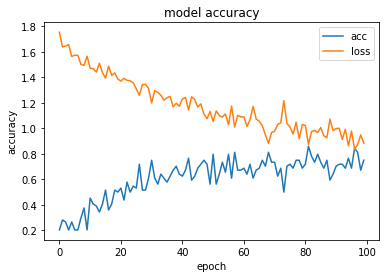

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper right')
plt.show()